In [69]:
#Dependencies 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base

from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import and_,or_,desc
from sqlalchemy.sql import label

In [7]:
#Connect to sqlite database 
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [8]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)

#Save Reference to classes
Measurement= Base.classes.Measurement
Station= Base.classes.Station

In [9]:
#Create database session
session = Session(engine)

# Precipitation Analysis
Expected average precipitation for June 8th, 2017 to June 23th, 2017 base on average precipitation data from 2011-2017.

In [75]:
#sel= [Measurement.date,
    #func.avg(Measurement.prcp)]
#june_data= session.query(*sel).\

june_data= session.query(Measurement.prcp, Measurement.date).\
            filter(func.strftime("%m",Measurement.date) == "06").\
            group_by(Measurement.prcp).\
            order_by((Measurement.date)).all()
june_data
june_data = pd.DataFrame(june_data).set_index('date')
june_data.head()

,prcp
date,
2011-06-01,0.61
2011-06-03,0.56
2011-06-03,1.71
2011-06-03,1.75
2011-06-03,2.00


In [77]:
#yearly/daily precipitation data from June 
june_data.index.value_counts().head()

2011-06-04    4
2011-06-03    4
2011-06-05    3
2015-06-04    2
2015-06-18    2
Name: date, dtype: int64

In [78]:
june_averageG= june_data.groupby('date')
june_averages=june_averageG.mean()
june_averages

,prcp
date,
2011-06-01,0.610000
2011-06-03,1.505000
2011-06-04,2.150000
2011-06-05,2.793333
2011-06-08,0.230000
2011-06-12,1.500000
2011-06-13,0.410000
2011-06-20,0.910000
2011-06-21,1.030000


In [82]:
#Filter vacation dates 
#june_vacation = session.query(june_averages).\
                #filter(Measure.date >'2016-06-08').\
                #order_by((Measure.date)).\
                #all()

# Change Daily/Yearly plot!!

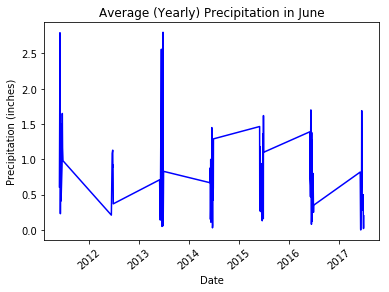

In [89]:
x_axis = [dt.datetime.strptime(x, '%Y-%m-%d') for x in june_averages.index]
plt.plot(x_axis,june_averages['prcp'],color='blue')
plt.title("Average (Yearly) Precipitation in June")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=40)
#plt.savefig('avg_rain.png')
plt.show()

# Station Analysis

# Temperature Analysis